In [1]:
from utils import df_plot, monta_df, reg_plot

BINS = 16


In [2]:
df, imagens = monta_df(BINS, '2017-07-01', '2017-07-15')
df.head()

,15.9375,31.875,47.8125,63.75,79.6875,95.625,111.5625,127.5,143.4375,159.375,175.3125,191.25,207.1875,223.125,239.0625,255.0,peso
0,71109,17985,13254,11664,10407,8844,7941,7602,7731,9039,10395,8925,13263,54246,3687,18630,26970.0
1,131337,33591,17304,11175,8964,8064,5841,3945,2937,2682,4704,4701,4698,50211,513,7611,28870.0
2,100608,6774,4581,3381,2616,2067,1551,885,879,807,1857,2259,2733,10116,237,5124,29086.4
3,20772,12282,10656,8790,8421,8928,9585,9360,9174,9147,9921,11598,12000,80820,21054,12159,28870.0
4,74277,6039,5559,3588,2916,2538,1788,1221,984,918,1767,2445,2334,7638,282,6666,21637.5


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    df[df.columns[:15]], df['peso'], test_size=0.25, random_state=42)
print(df.columns)

Index([ 15.9375,   31.875,  47.8125,    63.75,  79.6875,   95.625, 111.5625,
          127.5, 143.4375,  159.375, 175.3125,   191.25, 207.1875,  223.125,
       239.0625,    255.0,   'peso'],
      dtype='object')


Mean squared error: 6935692.68
Mean absolute error: 1787.67
Median absolute error: 1191.34
Variance score: 0.90


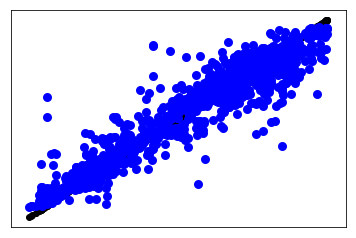

1199


In [28]:

forest = RandomForestRegressor(max_depth=10, random_state=0)
forest.fit(X_train, y_train)

plt = reg_plot(forest, X_test, y_test)
print(len(X_test))

[3996 1289 3790 1018 1487 1879  734 1418  221 2341 3397 4556 4019 1552
  377 3046  970 1811 2822 2459 1987 4186  889 2937 3281   59 3004 3811
 2985 1386  150  977 2805  377  130  726 2394 3036 4714  161 2473]


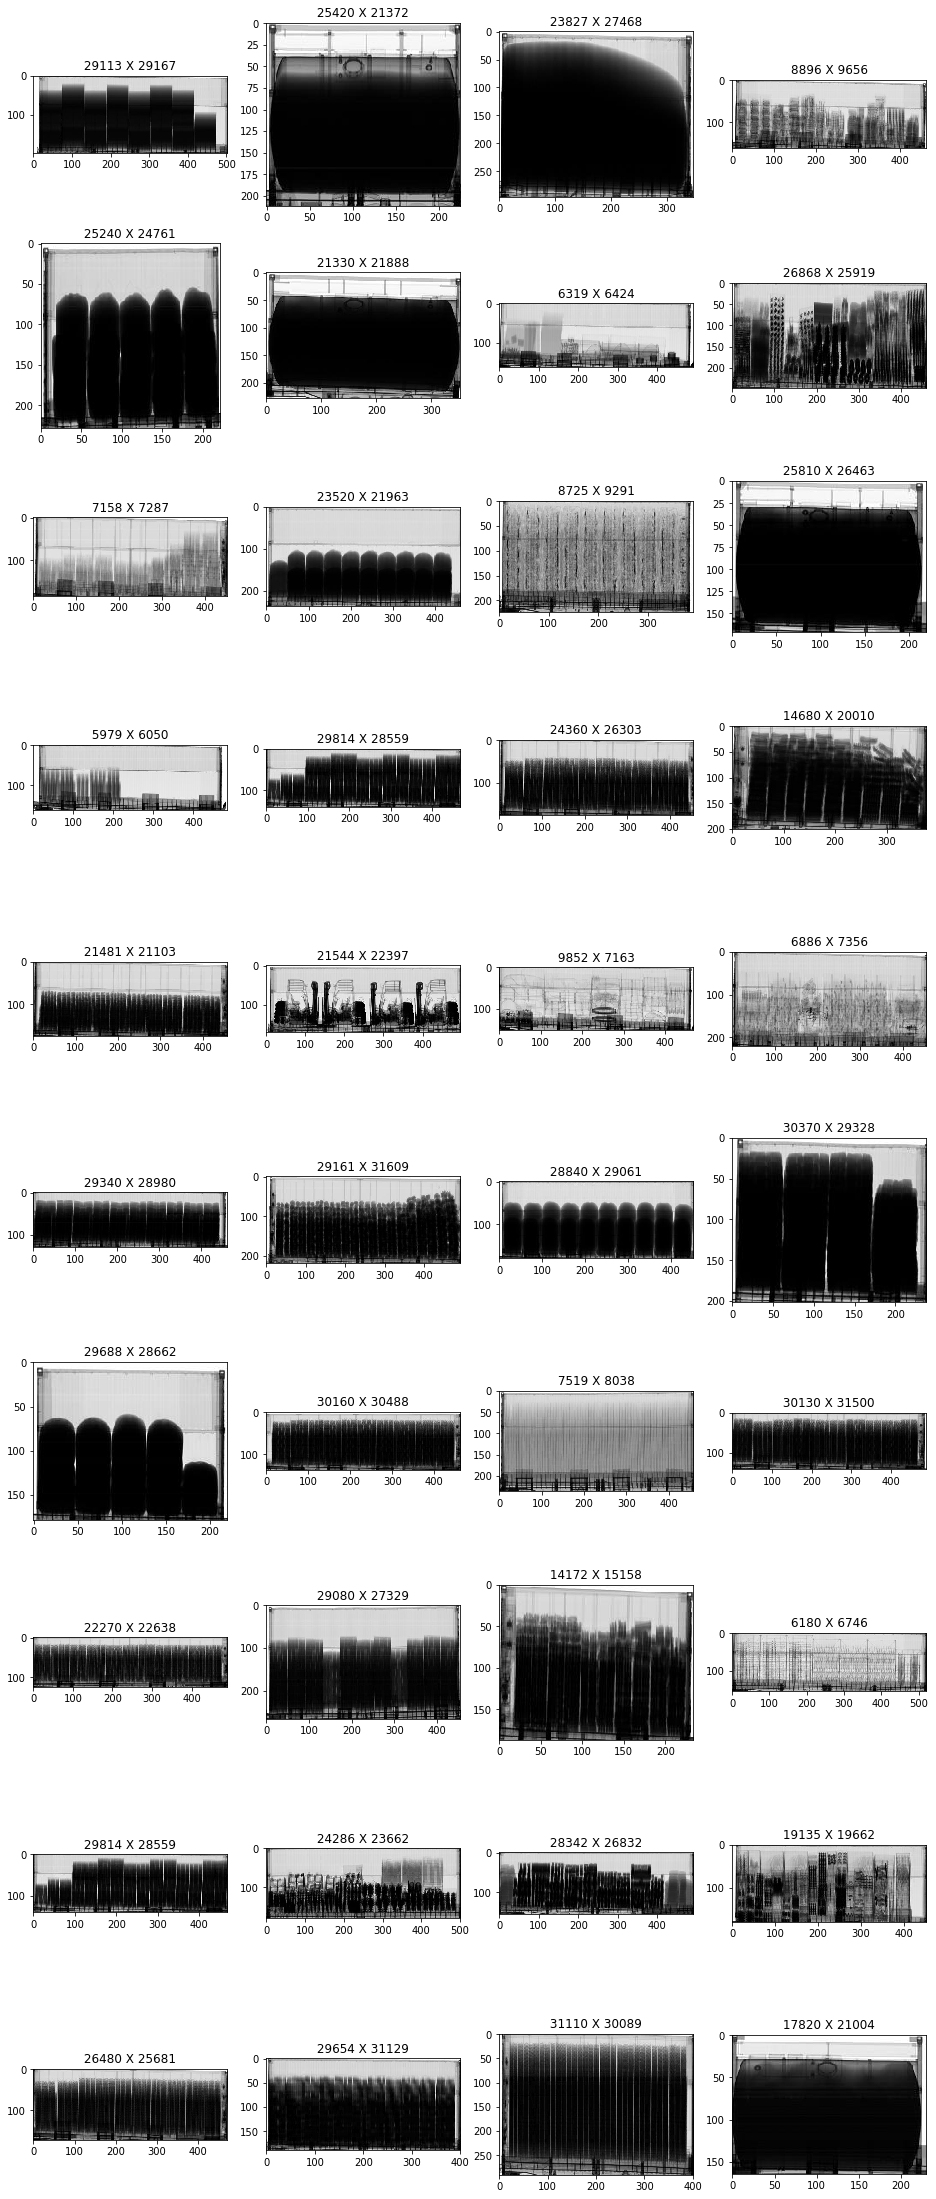

In [48]:
import matplotlib.pyplot as plt 
import numpy as np

fig=plt.figure(figsize=(16, 40))
columns = 4
rows = 10

indexes = np.random.randint(len(imagens) - 1, size=columns*rows + 1)
print(indexes)
random_histograms = [np.histogram(np.asarray(imagens[index][0]), bins=BINS)[0][:15] for index in indexes]
random_predicts = forest.predict(random_histograms)
for i in range(1, columns*rows +1):
    img = imagens[indexes[i]][0]
    ax = fig.add_subplot(rows, columns, i)
    title = ' %d X %d ' % (df['peso'].iloc[indexes[i]],
                            random_predicts[i])
    ax.set(title=title )
    plt.imshow(img)
plt.show()




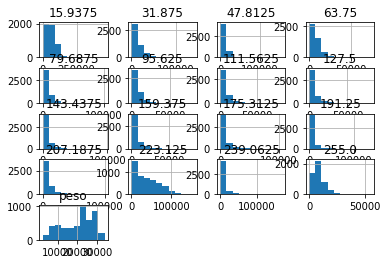

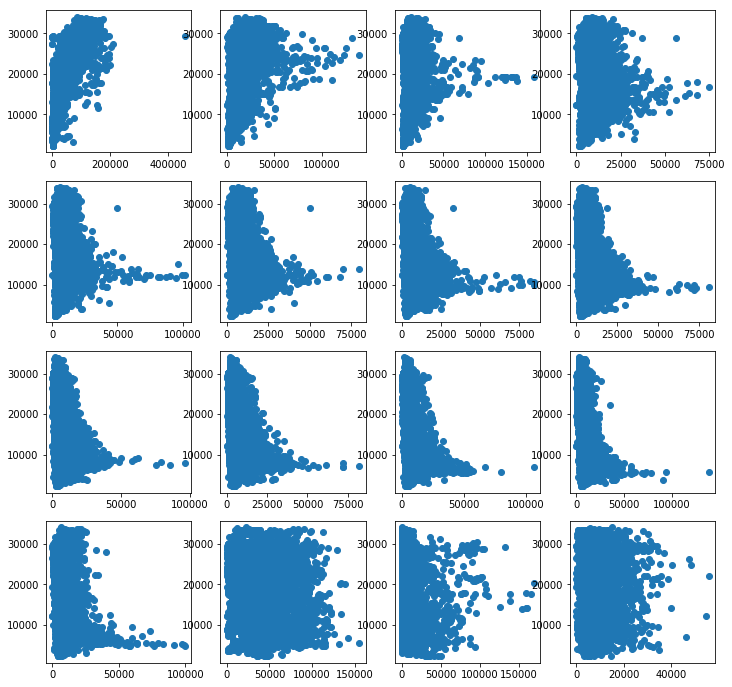

0 [[1.        0.7989298]
 [0.7989298 1.       ]]
1 [[1.         0.33737569]
 [0.33737569 1.        ]]
2 [[1.         0.09709765]
 [0.09709765 1.        ]]
3 [[ 1.         -0.08386295]
 [-0.08386295  1.        ]]
4 [[ 1.         -0.23223191]
 [-0.23223191  1.        ]]
5 [[ 1.        -0.3515992]
 [-0.3515992  1.       ]]
6 [[ 1.         -0.41946589]
 [-0.41946589  1.        ]]
7 [[ 1.       -0.487175]
 [-0.487175  1.      ]]
8 [[ 1.         -0.53029456]
 [-0.53029456  1.        ]]
9 [[ 1.         -0.56152036]
 [-0.56152036  1.        ]]
10 [[ 1.         -0.56219175]
 [-0.56219175  1.        ]]
11 [[ 1.         -0.54603221]
 [-0.54603221  1.        ]]
12 [[ 1.         -0.45811722]
 [-0.45811722  1.        ]]
13 [[ 1.         -0.19283515]
 [-0.19283515  1.        ]]
14 [[ 1.        -0.1800617]
 [-0.1800617  1.       ]]
15 [[1.         0.01076069]
 [0.01076069 1.        ]]


In [5]:
from utils import df_plot

df_plot(df, None)